### Trading Causes Exponential Distribution of Wealth.

from Jordan Peterson:
<br> - https://www.youtube.com/watch?v=NusYLzb-Uho&t=350s
<br> - http://physics.umd.edu/~yakovenk/econophysics/animation.html
<br>
<br>At the beginning everyone has $50,000, and graph is a delta function.
<br>When trading starts, the graph spreads into normal distribution.
<br>Then it spreads more, eventually into exponential distribution.
<br>
<br>Two tips about of this notebook:
<br> - same graph is being refreshed using ```clear_output(wait=True)```
<br> - if you stop the execution by interrupting the kernel, it stops gracefully without the red error trace

In [1]:
import os, sys, time, random
from IPython.display import clear_output
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
!python --version

Python 3.9.12


In [3]:
def mygraph(vals_structs, stat_str = "", range=(-50000, 10**6)):
    """
    # accepts vals - list of 4 dicts, 
    #    each with 2 elements - data list and n_trades
    # stat_strdata is the list
    """
    clear_output(wait=True)
    # -----------------------------------------
    mytitle = "Distribution of Wealth"
    if len(stat_str) <=0 :
        stat_str = " - Press stop button (square) to stop execution."
    # print(mytitle + stat_str)
    # -----------------------------------------
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
    ax0,ax1,ax2,ax3 = axes.flatten();
    n_bins = 45;
    _ = ax0.hist(vals_structs[0]["data"], n_bins, histtype='bar', range=range)
    _ = ax0.set_title(f"{vals_structs[0]['n_trades']} trades")
    _ = ax0.grid(True)

    _ = ax1.hist(vals_structs[1]["data"], n_bins, histtype='bar', range=range)
    _ = ax1.set_title(f"{vals_structs[1]['n_trades']:,d} trades")
    _ = ax1.grid(True)

    _ = ax2.hist(vals_structs[2]["data"], n_bins, histtype='bar', range=range)
    _ = ax2.set_title(f"{vals_structs[2]['n_trades']:,d} trades")
    _ = ax2.grid(True)

    _ = ax3.hist(vals_structs[3]["data"], n_bins, histtype='bar', range=range)
    _ = ax3.set_title(f"{vals_structs[3]['n_trades']:,d} trades")
    _ = ax3.grid(True)
    # _ = fig.suptitle(mytitle + stat_str)
    fig.tight_layout()
    _ = plt.show() ;

In [4]:
data = {}
N = 10000   # number of people
N1= N-1

orig_wealth = int(50000)                 # in dollars
trade_amount = int(round(0.01 * orig_wealth))   # in dollars

debt_allowed = int(-2*orig_wealth)      # max debt - cr. cards + loans
debt_check_level = debt_allowed + 0.5*trade_amount

graph_range = (debt_allowed, 8*orig_wealth)

vals = [orig_wealth]*N
vals_structs = [{},{},{},{}]
for ii in range(4):
    vals_structs[ii]['data'] = vals.copy()
    vals_structs[ii]['n_trades'] = 0

N_trades = 10**6 # trades per time unit

print(f"orig_wealth  = {orig_wealth:10,d}")
print(f"trade_amount = {trade_amount:10,d}")
print(f"debt_allowed = {debt_allowed:10,d}")
print(f"N_people       = {N:10,d}")
print(f"N_trades/time  = {N_trades:10,d}")

orig_wealth  =     50,000
trade_amount =        500
debt_allowed =   -100,000
N_people       =     10,000
N_trades/time  =  1,000,000


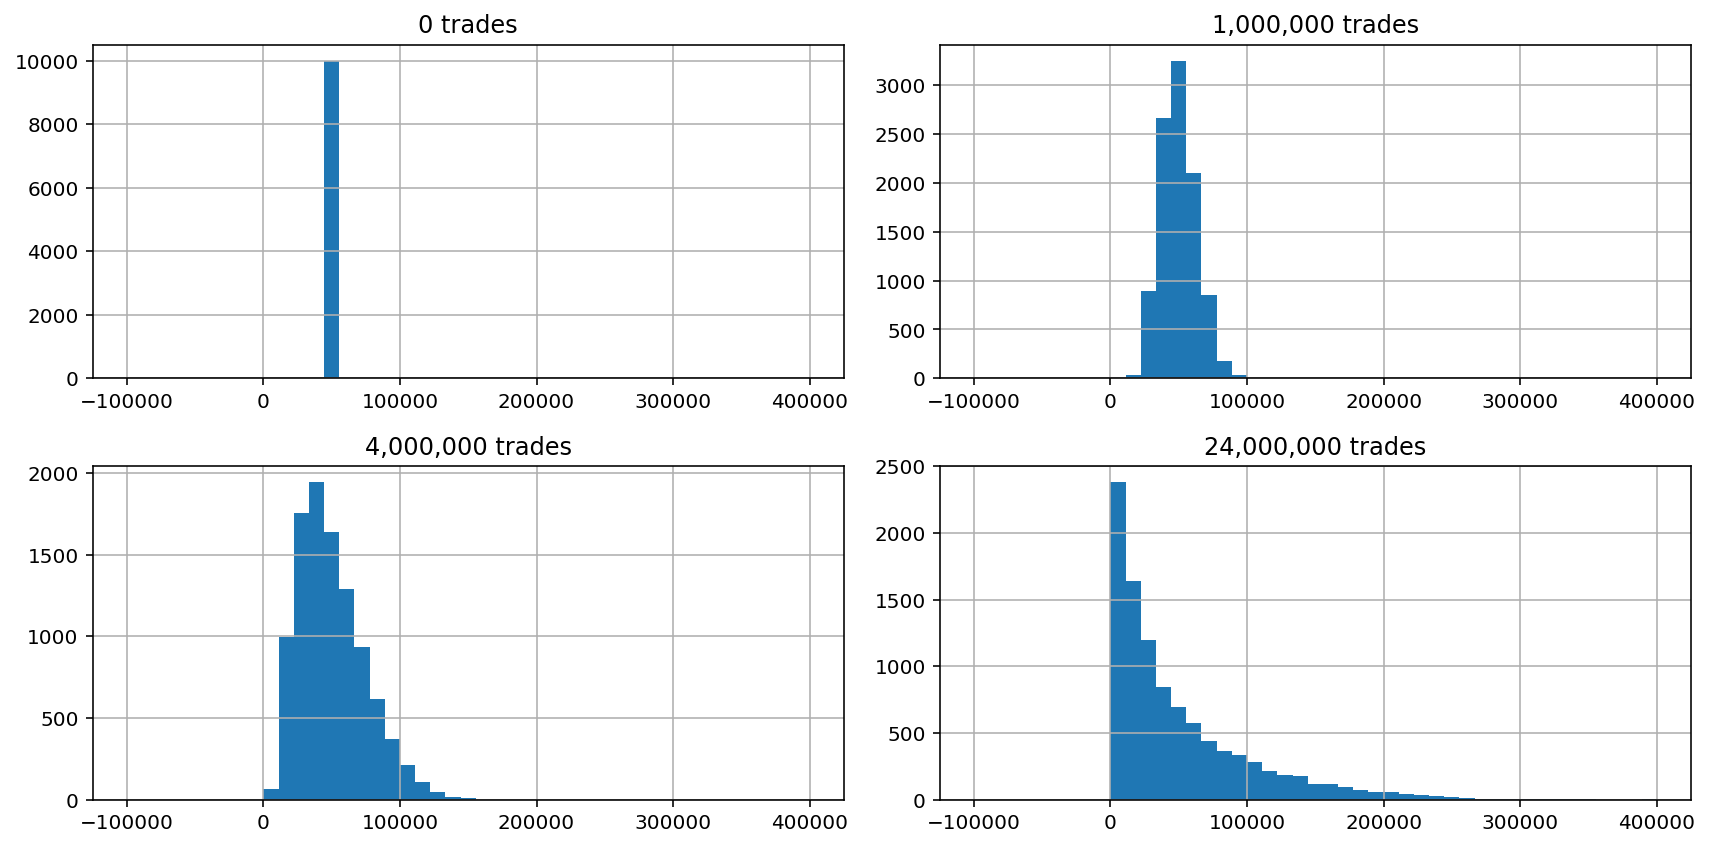

In [5]:
try:
    for mytime in range(1,26):
        if mytime == 1:
            vals_structs[0]['data'] = vals.copy()
            vals_structs[0]['n_trades'] = (mytime-1)*N_trades
        if mytime <= 2:
            vals_structs[1]['data'] = vals.copy()
            vals_structs[1]['n_trades'] = (mytime-1)*N_trades
        if mytime <= 5:
            vals_structs[2]['data'] = vals.copy()
            vals_structs[2]['n_trades'] = (mytime-1)*N_trades
        vals_structs[3]['data'] = vals.copy()
        vals_structs[3]['n_trades'] = (mytime-1)*N_trades
        mygraph(vals_structs, range=graph_range) # redraw histogram
        for mytrade in range(N_trades):          # trades per unit of time
            # -----------------------------
            # np.random.choice() is VERY SLOW.
            # so we chose two people "manually"
            i1 = random.randint(0,N1)      # select one person
            i2 = random.randint(0,N1)      # select another person
            while (i2 == i1):
                i1 = random.randint(0,N1)
                i2 = random.randint(0,N1)
            # -----------------------------
            # flip the coin for who is losing 
            loss_n = random.randint(0,1)   # 0 or 1 - coin toss
            # no one can go into debt below allowed level
            if (   ((loss_n==0) and (vals[i1] <= debt_check_level)) 
                or ((loss_n==1) and (vals[i2] <= debt_check_level))
               ):
                continue
            # OK, do the trade:
            trade_size = 0.02*min(vals[i1],vals[i2])            
            if loss_n == 0:   # i1 has lost
                vals[i1] -= trade_size # loss
                vals[i2] += trade_size # gain
            else:
                vals[i1] += trade_size # gain
                vals[i2] -= trade_size # loss

except KeyboardInterrupt:
    vals_structs[3]['data'] = vals
    vals_structs[3]['n_trades'] = (mytime-1)*N_trades
    mygraph(vals_structs, stat_str="STOPPED", range=graph_range)

Other things to consider to make model more "Real Life":
 - <font color="red">If you allow people to go into debt for 100K,<br>
   then whole distribution will shift into debt, <br>
   and most of the people will end up sitting in debt.</font>
 - In real life people are not equal at start. 
 - In real life people are not equal at ability to learn.
   Success breeds more learning and more success.
 - In real life people have different levels of activity, of risk tollerance, ...
 - Richer people can do much bigger transactions with other rich people
 - Businesses do many more transactions than individuals
 - Influence of taxes
 - Influence of government deficit
 
 Question:
 - how to converge to final distribution faster?
 - how all this relate to distributions in Physics? 
   - https://en.wikipedia.org/wiki/Boltzmann_distribution 
   - https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics
   - https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_statistics
   - https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_statistics
   

### Real Life Wealth Distribution in the US:
    
https://wallethacks.com/average-median-income-in-america/ 

In 2019:

average wage ~ $52K

Top N-pct earners make at least:

| Percent | Income ($K) |
| ----------- | ----------- |
| 5 | 250 |
| 10 | 140 |
| 20 | 100 |
| 30 | 45 |
| 40 | 35 |
| 50 | 25 |
| 60 | 20 |
| 70 | 10 |
| 80 | 5 |
| 90 | <5 |

Note that the official poverty is approx. $25K, so approx half of population is poor.

<img src="images/Household-Wages-2015-wallethacks.webp">

Source Data: Social Security Administration Wage Statistics for 2015

On the X axis you have the ranges of wages, and on the Y axis you have the count of households. 
<br>Note the two hitches : Red "1" 200-250K, and Green "2" 500-1000K. 